In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path='../data/KGHM_clear.csv'

In [3]:
df=pd.read_pickle(data_path)

In [4]:
df.head()

,Name,Date,Open,High,Low,Close,Volume
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9


In [5]:
df_part=df.loc[:100,:]

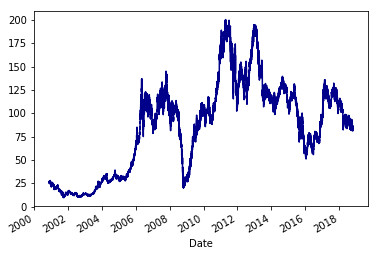

In [6]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

This method is very slow

In [7]:
# import matplotlib.pyplot as plt
# plt.plot(df['Date'], df['Open'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [7]:
ser_diff = df.Date.diff()

In [8]:
ser_diff=ser_diff.dt.total_seconds().fillna(0)

In [9]:
df['TimeDelta']=ser_diff

In [10]:
df.head()

,Name,Date,Open,High,Low,Close,Volume,TimeDelta
0,KGHM,2000-11-17 10:00:24,26.3,26.3,26.3,26.3,10840,0.0
1,KGHM,2000-11-17 10:00:25,26.3,26.3,26.3,26.3,1035,1.0
2,KGHM,2000-11-17 10:00:26,26.3,26.3,26.3,26.3,57,1.0
3,KGHM,2000-11-17 10:03:29,26.3,26.3,26.3,26.3,20288,183.0
4,KGHM,2000-11-17 10:09:28,26.2,26.2,26.2,26.2,9,359.0


In [11]:
df["CoursChange"]=df.Open-df.Close.shift(1)

In [12]:
df["LowHighDiff"]=df["High"]-df["Low"]
df["OpenCloseDiff"]=df["Open"]-df["Close"]

In [24]:
df=df.drop(df[df["TimeDelta"]>800000].index)

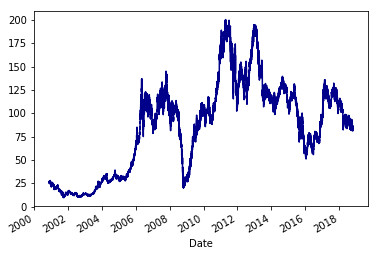

In [13]:
ax1 = df.plot(x='Date',y='Open',c='DarkBlue',legend=False)

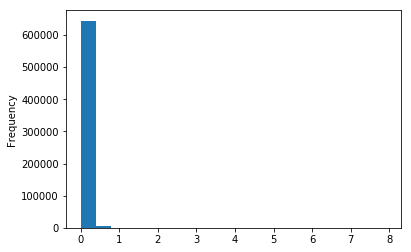

In [15]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)

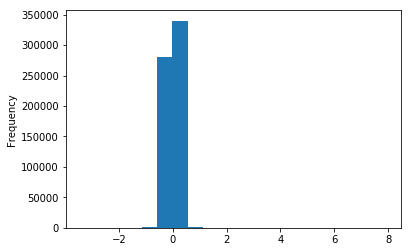

In [16]:
df.OpenCloseDiff[df["OpenCloseDiff"]!=0].plot.hist(bins=20)

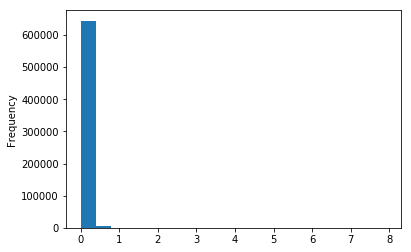

In [17]:
df.LowHighDiff[df["LowHighDiff"]!=0].plot.hist(bins=20)

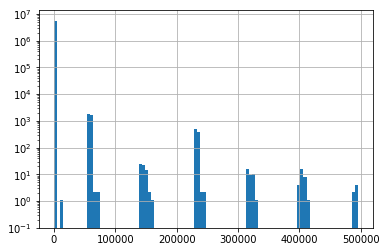

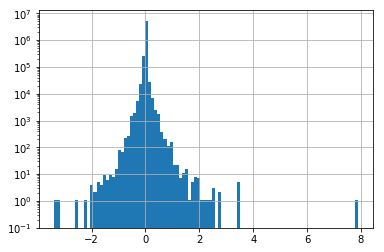

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
fig, ax = plt.subplots()
df.TimeDelta.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
fig,ax2=plt.subplots()
df.OpenCloseDiff.hist(ax=ax2, bins=100, bottom=0.1)
ax2.set_yscale('log')

In [19]:
df.OpenCloseDiff.sum()

2191.6699999999887

In [20]:
df.LowHighDiff.sum()

51162.71000000005

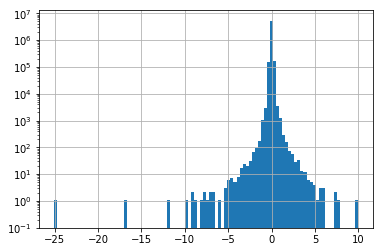

In [21]:
fig, ax = plt.subplots()
df.CoursChange.hist(ax=ax, bins=100, bottom=0.1)
# ax.title("CoursChange")
# df.CoursChange[df["CoursChange"]!=0].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
# df.CoursChange[df["CoursChange"]!=0].plot.hist(bins=20)

Bardzo dlugo się wykonuje

/home/filip/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


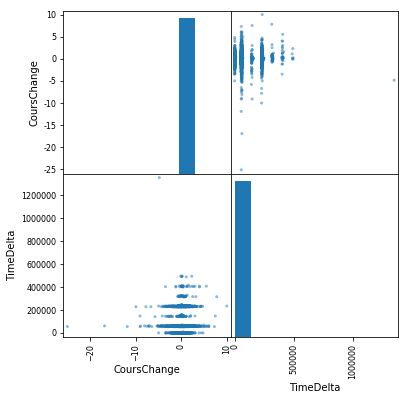

,CoursChange,TimeDelta
CoursChange,1.00000,0.03465
TimeDelta,0.03465,1.00000


In [22]:
pd.scatter_matrix(df[["CoursChange","TimeDelta"]], figsize=(6, 6))
plt.show()
df[["CoursChange","TimeDelta"]].corr()

In [28]:
df[["CoursChange","TimeDelta"]].corr()

,CoursChange,TimeDelta
CoursChange,1.000000,0.038517
TimeDelta,0.038517,1.000000


/home/filip/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


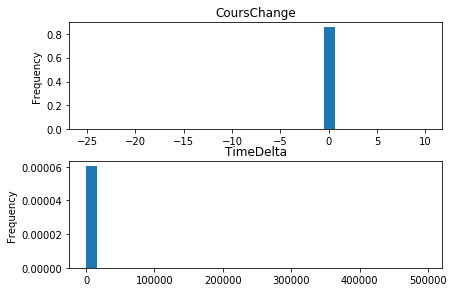

In [29]:
df2=df
df2=df2[["CoursChange","TimeDelta"]]

# This formats the plots such that they appear on separate rows
fig,axes= plt.subplots(2,1)
fig.tight_layout()

# Plot the PDF
df2.CoursChange.plot(ax=axes[0],kind='hist', normed=True, bins=30,title="CoursChange")
# plt.show()
# plt.title("CoursChange")
# plt.subplot(212)
df2.TimeDelta.plot(ax=axes[1],kind='hist', normed=True, bins=30,title="TimeDelta")

# Plot the CDF
# df2.CoursChange.plot(ax=axes[1], kind='hist', normed=True, cumulative=True, bins=30)
plt.show()


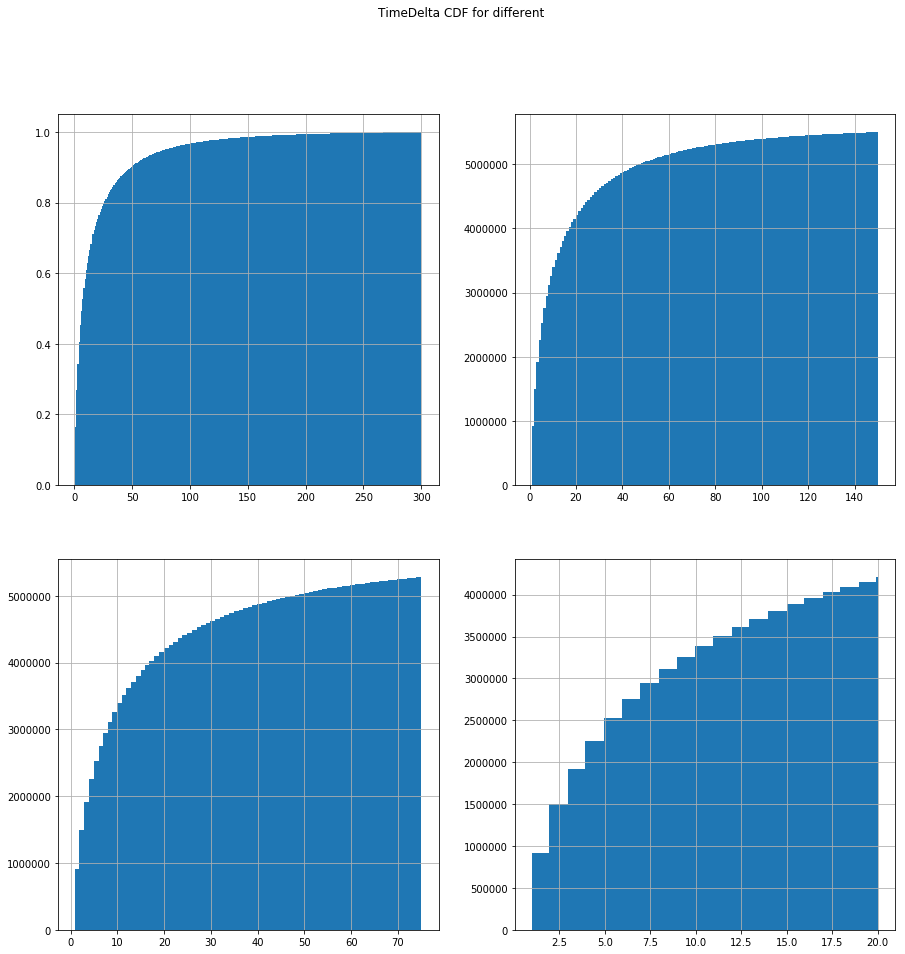

In [70]:
'''Not working well, if range to low, plot doesnt show all values'''
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=[15,15])
# plt.title("TimeDelta CDF")
df2.TimeDelta.hist(ax=axes[0,0],cumulative=True, density=1, bins="auto",grid=True,log=False,range=[1,300])
plt.suptitle("TimeDelta CDF for different ")
df2.TimeDelta.hist(ax=axes[0,1],cumulative=True, density=0, bins="auto",grid=True,log=False,range=[1,150])
df2.TimeDelta.hist(ax=axes[1,0],cumulative=True, density=0, bins="auto",grid=True,log=False,range=[1,75])
df2.TimeDelta.hist(ax=axes[1,1],cumulative=True, density=0, bins="auto",grid=True,log=False,range=[1,20])
plt.show()

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = df.TimeDelta
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':2500, 'size':1, 'start':0}
    )]

py.iplot(data, filename='TimeDeltaCDF')

ModuleNotFoundError: No module named 'plotly'

In [79]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = df.CoursChange
data = [go.Histogram(x=x,
                     cumulative=dict(enabled=True),histnorm='probability',autobinx = False,xbins={'end':11, 'size':0.01, 'start':-26}
    )]

py.iplot(data, filename='CoursChangeCDF')

/home/filip/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



PlotlyRequestError: 
<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>


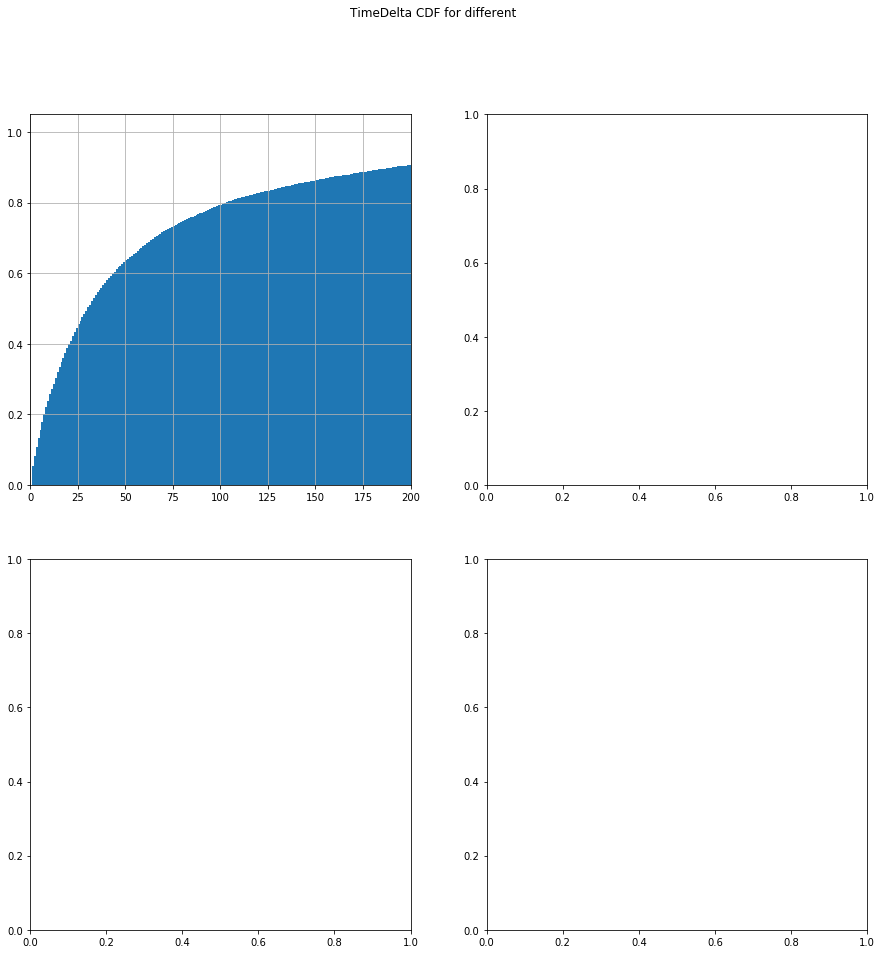

In [50]:
'''Beter but hard to chose only interesting region.If plotly doesnt work well, is the best way'''
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=[15,15])
df.TimeDelta.hist(ax=axes[0,0],cumulative=True, density=1, bins=range(0, 1000, 1),grid=True,log=False)
plt.suptitle("TimeDelta CDF for different ")
axes[0,0].set_xlim(0,4000)

plt.show()

In [27]:
df[df["TimeDelta"]>800000].index

Int64Index([], dtype='int64')

In [72]:
df.iloc[3371819]

Name                            KGHM
Date             2014-01-15 17:04:08
Open                          113.75
High                          113.75
Low                           113.75
Close                         113.75
Volume                          2816
TimeDelta                          6
CoursChange                        0
LowHighDiff                        0
OpenCloseDiff                      0
Name: 3371819, dtype: object

In [35]:
df.iloc[3371820]

Name                            KGHM
Date             2014-01-31 09:00:01
Open                           108.9
High                           108.9
Low                            108.9
Close                          108.9
Volume                          3996
TimeDelta                1.35335e+06
CoursChange                    -4.85
LowHighDiff                        0
OpenCloseDiff                      0
Name: 3371820, dtype: object

Anomalia pomiędzy 2014-01-31 09:00:01 a  2014-01-15 17:04:08 . Brak danych przez 15 dni

In [31]:
df[df["OpenCloseDiff"]>4]

,Name,Date,Open,High,Low,Close,Volume,TimeDelta,CoursChange,LowHighDiff,OpenCloseDiff
4901662,KGHM,2017-01-27 09:00:01,121.0,121.0,113.1,113.1,55437,57312.0,-1.05,7.9,7.9


In [ ]:
df.loc[4901630:4901750][["Open"]].plot()

Dziwna zmiana ceny, notowania z poprzedniego dnia się urywają, duże różnice pomiędzy low and high